- Open the small file and prepare the data for creating shingles
- n-gram = 4

In [1]:
import pandas as pd
import re
import time
import binascii

In [2]:
small_dataset = 'data/news_articles_small.csv'
df_small_dataset = pd.read_csv(small_dataset)

In [3]:
df_small_dataset.head()

,News_ID,article
0,0,russian foreign minister sergei kozyliev arriv...
1,1,"''''' one one', and , the one theer , it was. ..."
2,2,The threat of an opposition boycott and a smal...
3,3,The Bank of France increased its short-term in...
4,4,british foreign secretary douglas hurd said th...


In [4]:
#Pre-process data
#Convert to lowercase.
df_small_dataset['article'] = df_small_dataset['article'].str.lower()

#Remove punctuation
p = re.compile(r'[^\w\s]+')
df_small_dataset['article'] = [p.sub('', x) for x in df_small_dataset['article'].tolist()]


In [5]:
"""
Split each document in a list of words

small_dataset_split = [
    [documentID, document_text]
]
"""

small_dataset_split = []
for idx, row in df_small_dataset.iterrows():
    small_dataset_split.append([row[0], row[1]])

# df_small_dataset['splitted'] = small_dataset_split

In [6]:
def jaccard(list1, list2):
    doc1 = set(list1.split())
    doc2 = set(list2.split())

    intersection = doc1.intersection(doc2)
    union = doc1.union(doc2)

    return float(len(intersection) / len(union))

In [7]:
#Calculate Jaccard similarities
t0 = time.time()

JSim_list = []

for i in range(0, len(small_dataset_split)):
# Print progress every 100 documents.
    if (i % 100) == 0:
        print(str(i) + " / " + str(len(small_dataset_split)))

    docId1 = small_dataset_split[i][0]
    s1 = small_dataset_split[i][1]

    for j in range(i + 1, len(small_dataset_split)):
        # Retrieve the set of shingles for document j.
        docId2 = small_dataset_split[j][0]
        s2 = small_dataset_split[j][1]

        # Calculate and store the actual Jaccard similarity.
        similarity = jaccard(s1, s2)
        JSim_list.append([docId1, docId2, similarity])

t1= time.time()
print('Time: ', t1-t0)

0 / 1000
100 / 1000
200 / 1000
300 / 1000
400 / 1000
500 / 1000
600 / 1000
700 / 1000
800 / 1000
900 / 1000
Time:  64.1200737953186


In [8]:
import csv

with open('jaccardSim.csv', 'w') as f:
    header = ['doc1', 'doc2', 'similarity']
    writer = csv.writer(f)
    writer.writerow(header)
    writer.writerows(JSim_list)

In [9]:
all_similarities = []
all_docIds = []

for x, y, z in JSim_list:
    all_docIds.append(x)
    all_similarities.append(z)

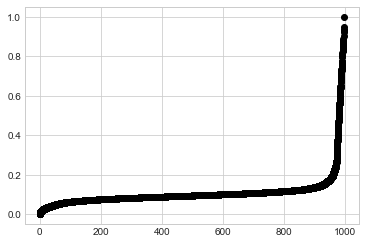

In [10]:
all_similarities.sort()

import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

x = all_docIds
y = all_similarities
plt.scatter(x, y, marker='o', color='black');

In [ ]:
#source: https://www.tutorialspoint.com/matplotlib/matplotlib_bar_plot.htm
import matplotlib.pyplot as plt
left = [1, 2, 3, 4, 5,6,7,8,9,10]

x_label = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

plt.bar(left, count_grouped, tick_label = x_label,
            width = 0.8, color = ['red', 'yellow', 'green', 'blue', 'cyan', 'red', 'yellow', 'green', 'blue', 'cyan'])

plt.xlabel('Similarity score', fontsize=20)
plt.ylabel('Documents', fontsize=20)

In [ ]:
x = 'abcd'
y = x.encode()
y

In [ ]:
y.decode()


In [ ]:
#Add shingles with ngram 4
#Source: https://github.com/chrisjmccormick/MinHash/blob/master/runMinHashExample.py
# shingleID = 0
#
# shingledDocs = {}
# docIds = []
#
# t0 = time.time()
#
# totalShingles = 0
# for idx, row in df_small_dataset.iterrows():
#     shingles = set()
#     print(row)
#     print(len(row[2]))
#     print(len(row[2]) - 3)
#     for i in range(0, len(row[2]) - 3):
#         shingle = row[2][i]+ " " + row[2][i + 1] + " " + row[2][i + 2] + " " + row[2][i + 3]
        # print(shingle)
#         crc =  binascii.crc32(shingle.encode()) & 0xffffffff
#         shingles.add(crc)
#
#     shingledDocs[row[0]]= shingles
#     docIds.append(row[0])
#     totalShingles = totalShingles + (len(row[2]) - 3)
#
# t1 = time.time()
# print('Time spent: ', t1-t0)
